In [1]:
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
device_name = tf.test.gpu_device_name()
device_name
keras.__version__

2.2.0


'2.3.0-tf'

In [2]:
for dirname, _, fname in os.walk('../input'):
    print(dirname, '.........', len(os.listdir(dirname)))

../input ......... 1
../input/mask-datasets-v1 ......... 1
../input/mask-datasets-v1/Mask_Datasets ......... 2
../input/mask-datasets-v1/Mask_Datasets/Validation ......... 2
../input/mask-datasets-v1/Mask_Datasets/Validation/Mask ......... 150
../input/mask-datasets-v1/Mask_Datasets/Validation/No_mask ......... 200
../input/mask-datasets-v1/Mask_Datasets/Train ......... 2
../input/mask-datasets-v1/Mask_Datasets/Train/Mask ......... 350
../input/mask-datasets-v1/Mask_Datasets/Train/No_mask ......... 400


In [7]:
image_size = 160
batch_size = 32

train_dir = '../input/mask-datasets-v1/Mask_Datasets/Train'
valid_dir = '../input/mask-datasets-v1/Mask_Datasets/Validation'

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    shear_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
)

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='binary'
    #class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='binary'
    #class_mode='categorical'
)

Found 750 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


In [18]:
from keras.layers.normalization import BatchNormalization

In [28]:
IMG_SHAPE = (image_size, image_size, 3)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3),input_shape=(image_size, image_size, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D((2, 2)),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D((2, 2)),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D((2, 2)),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3, 3)), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D((2, 2)),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(256, (3, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
  tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 158, 158, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 158, 158, 32)      128       
_________________________________________________________________
re_lu (ReLU)                 (None, 158, 158, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 77, 77, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 77, 77, 64)        256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 77, 77, 64)       

In [31]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(
    train_generator,
    epochs = 12,
    verbose=1,
    validation_data = valid_generator
)

Epoch 1/12
24/24 [==============================] - 32s 1s/step - loss: 0.1726 - accuracy: 0.9413 - val_loss: 0.3859 - val_accuracy: 0.8943
Epoch 2/12
24/24 [==============================] - 32s 1s/step - loss: 0.1291 - accuracy: 0.9520 - val_loss: 0.3888 - val_accuracy: 0.8543
Epoch 3/12
24/24 [==============================] - 32s 1s/step - loss: 0.0995 - accuracy: 0.9613 - val_loss: 0.0860 - val_accuracy: 0.9771
Epoch 4/12
24/24 [==============================] - 31s 1s/step - loss: 0.1103 - accuracy: 0.9493 - val_loss: 0.1135 - val_accuracy: 0.9657
Epoch 5/12
24/24 [==============================] - 32s 1s/step - loss: 0.0853 - accuracy: 0.9707 - val_loss: 0.0696 - val_accuracy: 0.9714
Epoch 6/12
24/24 [==============================] - 32s 1s/step - loss: 0.1011 - accuracy: 0.9613 - val_loss: 0.2435 - val_accuracy: 0.8914
Epoch 7/12
24/24 [==============================] - 31s 1s/step - loss: 0.1172 - accuracy: 0.9520 - val_loss: 0.0982 - val_accuracy: 0.9743
Epoch 8/12
24/24 [==

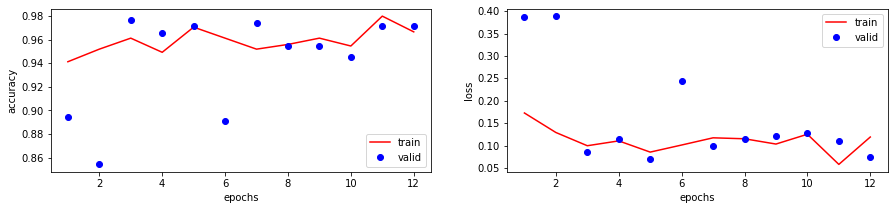

In [33]:
model.save('model_normed.h5')
def plotting():
    epochs = np.arange(1,len(history.history['loss'])+1)

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(15,3))
    plt.subplot(121)
    plt.plot(epochs, train_acc, 'r', label='train' )
    plt.plot(epochs, val_acc, 'bo', label='valid')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('accuracy')

    plt.subplot(122)
    plt.plot(epochs, train_loss, 'r', label='train')
    plt.plot(epochs, val_loss, 'bo', label='valid')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

plotting()

In [35]:
!ls

__notebook_source__.ipynb  model.h5  model_normed.h5


In [37]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labelssoftmax.txt', 'w') as f:
  f.write(labels)

{'Mask': 0, 'No_mask': 1}


In [38]:
!ls

__notebook_source__.ipynb  labelssoftmax.txt  model.h5	model_normed.h5


In [41]:
#saved_model_dir = 'model'
#tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('modelbase_normed.tflite', 'wb') as f:
  f.write(tflite_model)

In [43]:
!ls -l

total 13352
---------- 1 root root     263 Jun 14 15:22 __notebook_source__.ipynb
-rw-r--r-- 1 root root      12 Jun 14 16:08 labelssoftmax.txt
-rw-r--r-- 1 root root 4588616 Jun 14 16:07 model.h5
-rw-r--r-- 1 root root 4588616 Jun 14 16:07 model_normed.h5
-rw-r--r-- 1 root root 2236984 Jun 14 16:08 modelbase.tflite
-rw-r--r-- 1 root root 2236984 Jun 14 16:09 modelbase_normed.tflite
